## Import Data

In [4]:
import pandas as pd

df = pd.read_csv("/Users/meilinpan/Desktop/Projects/Airbnb-Price-Prediction/AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Data Cleaning

### Checking for missing values

In [5]:
# 检查缺失值
print(df.isnull().sum())

# 填充缺失值（使用均值或中位数）
df["reviews_per_month"].fillna(0, inplace=True)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


/var/folders/6x/pzlyt3t523vd1vy2ktbjrc7r0000gn/T/ipykernel_7585/1550023145.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["reviews_per_month"].fillna(0, inplace=True)


In [6]:
# 价格不能为 0 或负数
df = df[df["price"] > 0]

# 最少入住天数不能太大（去掉超过 365 天的房源）
df = df[df["minimum_nights"] <= 365]

### Visualizing the price

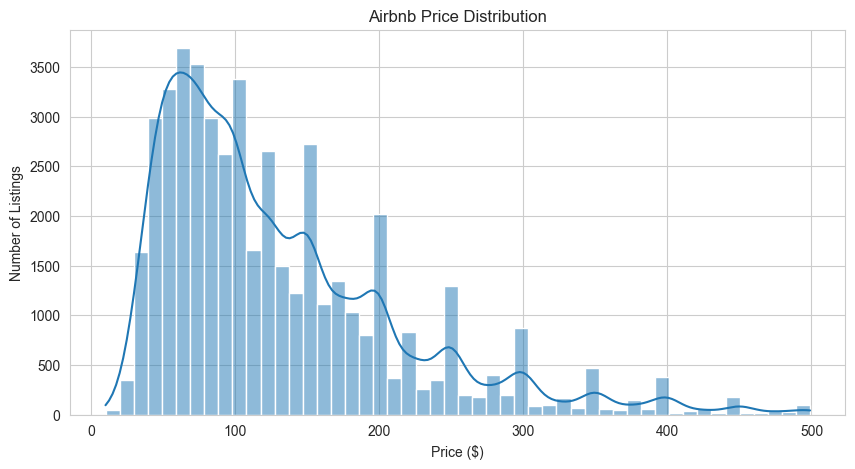

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置风格
sns.set_style("whitegrid")

# 画出价格分布直方图（去掉极端值）
plt.figure(figsize=(10,5))
sns.histplot(df[df["price"] < 500]["price"], bins=50, kde=True)
plt.xlabel("Price ($)")
plt.ylabel("Number of Listings")
plt.title("Airbnb Price Distribution")
plt.show()

#### From the plot, it demontrates most listings have a price of lower than $200. However, there are still listings that go above $1000.
#### The price distribution is right-skewed. Indicating that although most listings are affordable, there exist high-priced listings.

### Listing Distribution

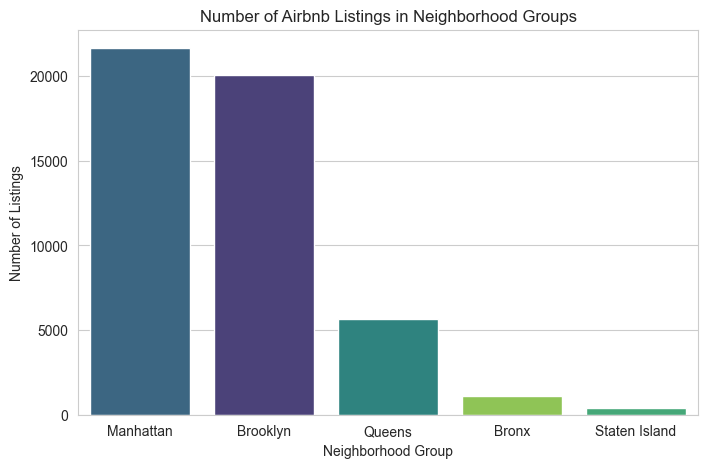

In [8]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="neighbourhood_group", hue="neighbourhood_group", order=df["neighbourhood_group"].value_counts().index, palette="viridis", legend=False)
plt.xlabel("Neighborhood Group")
plt.ylabel("Number of Listings")
plt.title("Number of Airbnb Listings in Neighborhood Groups")
plt.show()

#### Manhattan and Brooklyn have the most number of listings, and Staten Island has the least number of listings.

### Comparing Prices in Neighborhoods

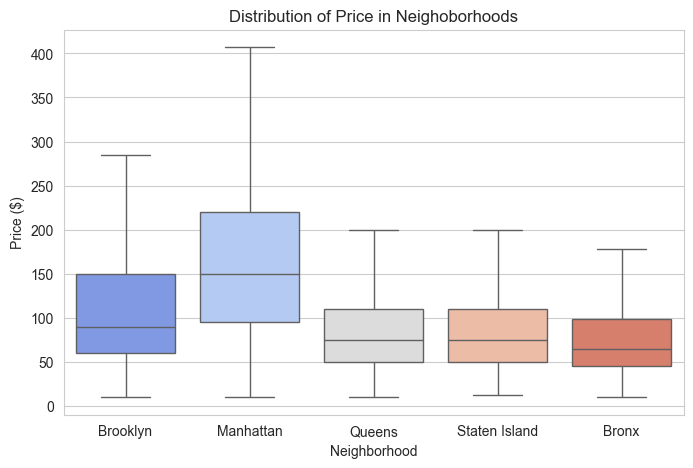

In [9]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="neighbourhood_group", hue="neighbourhood_group", y="price", showfliers=False, palette="coolwarm", legend = False)
plt.xlabel("Neighborhood")
plt.ylabel("Price ($)")
plt.title("Distribution of Price in Neighoborhoods")
plt.show()

#### Manhattan has the highest price, and the median price is much higher than the rest of the neighborhood groups. Brooklyn ranks the second. Queens and Bronx are the cheapest.

## Analyzing Factors affecting Price

### Effect of Room Type on Price

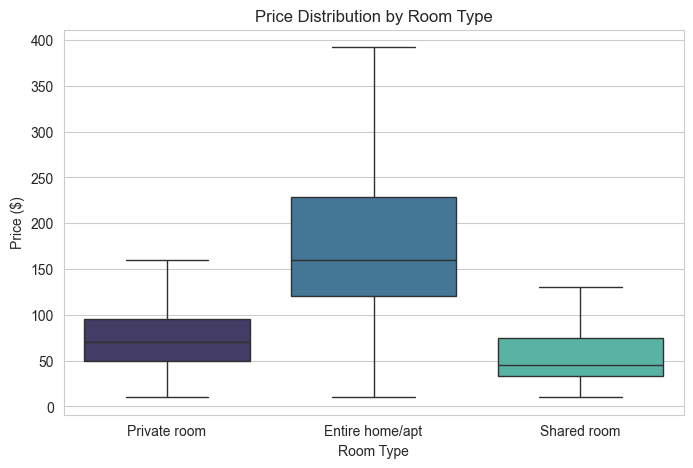

In [10]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="room_type", hue = "room_type", y="price", showfliers=False, palette="mako")
plt.xlabel("Room Type")
plt.ylabel("Price ($)")
plt.title("Price Distribution by Room Type")
plt.show()

#### Entire home/apartment is the most expensive. Private rooms have moderate prices. Shared rooms are the cheapest.

### Relationship Between Number of Reviews and Price

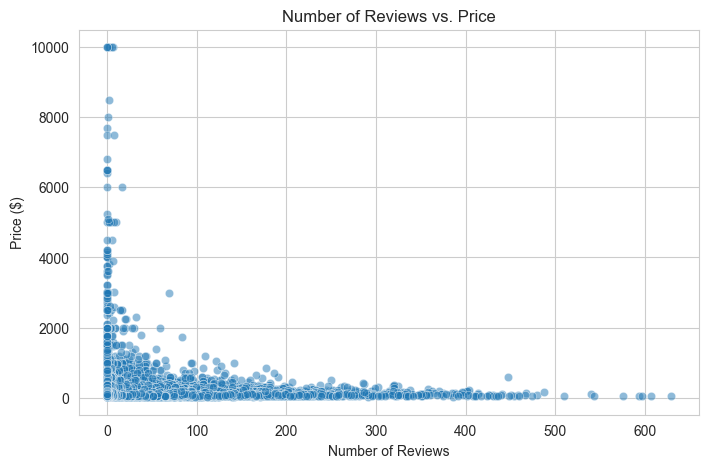

In [11]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="number_of_reviews", y="price", alpha=0.5)
plt.xlabel("Number of Reviews")
plt.ylabel("Price ($)")
plt.title("Number of Reviews vs. Price")
plt.show()

#### 	Listings with more reviews tend to have lower prices. Expensive listings usually have fewer reviews, possibly because fewer people can afford them. There is no clear linear relationship between price and review count.

### Impact of Availability on Price

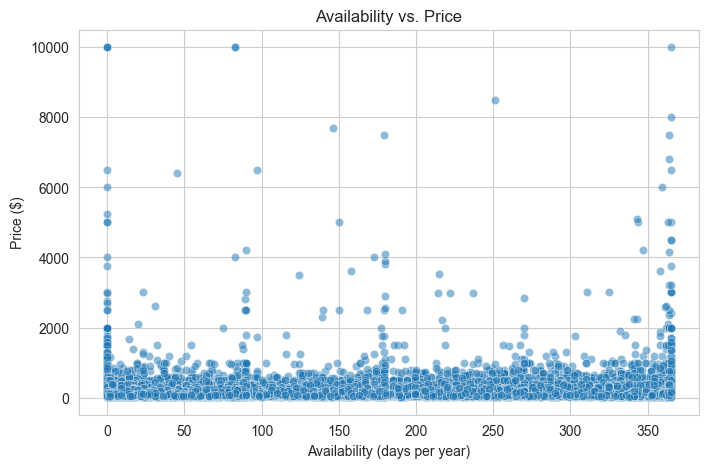

In [12]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="availability_365", y="price", alpha=0.5)
plt.xlabel("Availability (days per year)")
plt.ylabel("Price ($)")
plt.title("Availability vs. Price")
plt.show()

#### Most listings are available for fewer than 200 days per year. Availability does not strongly affect price, but high-price listings tend to have low availability.

### Correlation Heatmap (How Factors Relate to Price)

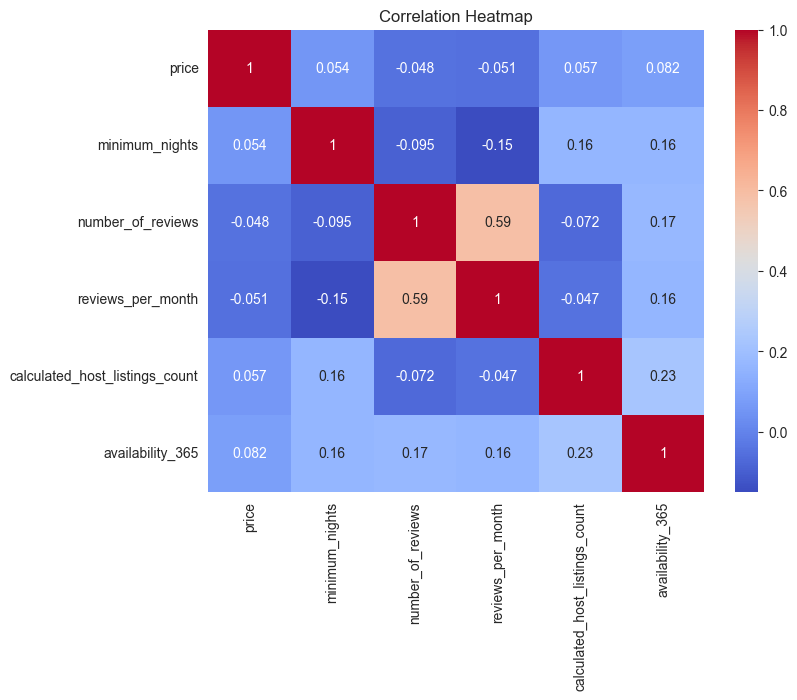

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[["price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

#### Price is not strongly correlated with most features. Number of reviews has a negative correlation with price (cheaper listings tend to have more reviews). Minimum nights and availability have weak correlations with price.

### Summary of Findings
	1.	Room type significantly impacts price: Entire homes are much more expensive than private/shared rooms.

	2.	More reviews generally mean lower prices: Cheaper listings tend to get rented more often.

	3.	Availability does not strongly affect price, but expensive listings are usually not available for many days.
    
	4.	No strong correlations between price and other numerical features.

### Machine Learning For Airbnb Price Prediction
#### Supervised Learning (Regression) will be used since price is continuous.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

### Data Preparation

In [15]:
# Select relevant features
features = ["room_type", "neighbourhood_group", "minimum_nights", "number_of_reviews", "reviews_per_month", "availability_365"]
target = "price"

# Drop outliers (e.g., extreme price values)
df = df[df["price"] < 500]  # Remove listings above $500 for better prediction

# One-hot encoding for categorical features
df_encoded = pd.get_dummies(df[features], drop_first=True)  # Convert categorical to numerical

# Separate target variable
X = df_encoded
y = df[target]

#### room_type and neighbourhood_group are categorical, so we convert them into numerical values (one-hot encoding)

### Split Data into Training and Testing Sets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 80% for training, 20% for testing. Helps evaluate model performance on unseen data.

### Train Machine Learning Models

#### Model 1: Linear Regression

In [17]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate performance
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MAE: {mae_lr:.2f}, R²: {r2_lr:.2f}")

Linear Regression - MAE: 44.89, R²: 0.41


#### MAE (Mean Absolute Error) tells us how far predictions are from actual prices.
#### R² Score shows how well the model explains price variation (1.0 = perfect fit).

#### Model 2: Random Forest (More Powerful)

In [18]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MAE: {mae_rf:.2f}, R²: {r2_rf:.2f}")

Random Forest - MAE: 44.90, R²: 0.40


#### Random Forest handles nonlinear relationships better and usually gives better predictions.

#### Compare Model Performance

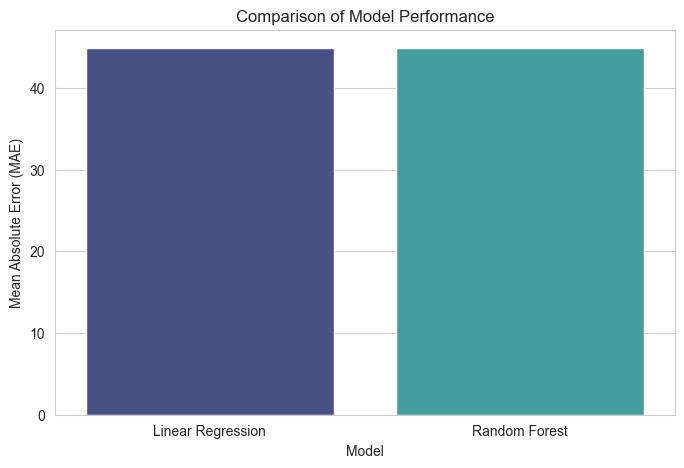

In [19]:
models = ["Linear Regression", "Random Forest"]
mae_values = [mae_lr, mae_rf]
r2_values = [r2_lr, r2_rf]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, hue = models, y=mae_values, palette="mako")
plt.xlabel("Model")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Comparison of Model Performance")
plt.show()

### Make Predictions with New Data

In [20]:
new_listing = pd.DataFrame({
    "room_type": ["Entire home/apt"], 
    "neighbourhood_group": ["Manhattan"], 
    "minimum_nights": [3], 
    "number_of_reviews": [15], 
    "reviews_per_month": [1.5], 
    "availability_365": [180]
})

# Convert categorical variables
new_listing_encoded = pd.get_dummies(new_listing, drop_first=True)
new_listing_encoded = new_listing_encoded.reindex(columns=X_train.columns, fill_value=0)

# Predict price using the best model (Random Forest)
predicted_price = rf_model.predict(new_listing_encoded)
print(f"Predicted Price: ${predicted_price[0]:.2f}")

Predicted Price: $129.96


### Improving Model Accuracy: Adding More Features

#### Right now, we are using room type, neighborhood, reviews, and availability. But location is a key factor in Airbnb pricing. Let’s add latitude and longitude.

In [21]:
# Add latitude and longitude to the feature set
features = ["room_type", "neighbourhood_group", "latitude", "longitude", "minimum_nights", 
            "number_of_reviews", "reviews_per_month", "availability_365"]

# One-hot encode categorical features
df_encoded = pd.get_dummies(df[features], drop_first=True)

# Define input (X) and target (y)
X = df_encoded
y = df["price"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Tune Hyperparameters of Random Forest

In [22]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameters to test
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [10, 20, 30, None], # Depth of each tree
    'min_samples_split': [2, 5, 10], # Minimum samples to split
    'min_samples_leaf': [1, 2, 4]    # Minimum samples in each leaf
}

# Run Randomized Search
rf_model = RandomForestRegressor(random_state=42)
rf_search = RandomizedSearchCV(rf_model, param_grid, n_iter=10, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
rf_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Parameters:", rf_search.best_params_)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20}


#### We test multiple combinations of Random Forest settings. (Random Search)
####	n_estimators: Number of trees in the forest (more trees = better accuracy, but slower).
####	max_depth: Maximum depth of each tree (deeper trees learn more, but may overfit).
####	min_samples_split: Minimum number of samples required to split a node.
####	min_samples_leaf: Minimum samples in a leaf (prevents overfitting).

#### Once the best settings are found, we use them in our model.

In [23]:
# Use the best parameters from the search
best_rf = RandomForestRegressor(**rf_search.best_params_, random_state=42)
best_rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = best_rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Tuned Random Forest - MAE: {mae_rf:.2f}, R²: {r2_rf:.2f}")

Tuned Random Forest - MAE: 38.63, R²: 0.53


In [25]:
import pandas as pd

# Define a new listing with all required features
new_listing = pd.DataFrame({
    "room_type": ["Entire home/apt"], 
    "neighbourhood_group": ["Manhattan"], 
    "latitude": [40.7],  # Ensure latitude is included
    "longitude": [-73.9],  # Ensure longitude is included
    "minimum_nights": [3], 
    "number_of_reviews": [15], 
    "reviews_per_month": [1.5], 
    "availability_365": [180]
})

# One-hot encode categorical variables (same as training)
new_listing_encoded = pd.get_dummies(new_listing, drop_first=True)

# Ensure it matches the trained model’s feature columns
new_listing_encoded = new_listing_encoded.reindex(columns=X_train.columns, fill_value=0)

# Predict price using the trained Random Forest model
predicted_price = best_rf.predict(new_listing_encoded)
print(f"Predicted Price: ${predicted_price[0]:.2f}")

Predicted Price: $148.19


### Exporting the model to prepare for deployment

In [24]:
import joblib

# Save the trained model to a file
joblib.dump(best_rf, "airbnb_model.pkl")

['airbnb_model.pkl']

In [26]:
print(X_train.columns)

Index(['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'availability_365', 'room_type_Private room',
       'room_type_Shared room', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island'],
      dtype='object')
